In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Twitch_Streamer_Data_2023.xlsx")

In [76]:
df

,ID,Channel,Watch time,Stream time,Peak viewers,Average viewers,Followers Prev Yr,Followers,Followers gained,Followers gained percent,Language,Partnered,Mature,Mean weekly watch hours,Mean weekly stream hours
0,1,KaiCenat,6917573295,111585,348593,61993,4101063,9043160,4942097,1.205077,English,1,0,2.217171e+06,35.764423
1,2,Gaules,6622047810,521235,253831,12704,3821821,4061076,239255,0.062602,Portuguese,1,1,2.122451e+06,167.062500
2,3,ibai,6263825640,82980,3442745,75485,12241985,15430621,3188636,0.260467,Spanish,1,0,2.007636e+06,26.596154
3,4,xQc,5740774005,111765,126238,51364,11483408,11981015,497607,0.043333,English,1,0,1.839992e+06,35.822115
4,5,fps_shaka,5015411025,211860,125341,23673,1053268,1367770,314502,0.298596,Japanese,1,0,1.607504e+06,67.903846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,Datto,171472065,61980,88152,2766,691978,738457,46479,0.067168,English,1,1,5.495900e+04,19.865385
896,897,Cydonia_Chiara,171389955,84435,13870,2029,147433,165604,18171,0.123249,Italian,1,0,5.493268e+04,27.062500
897,898,Roxasorg13th,171240495,101820,7619,1681,98345,172401,74056,0.753023,Spanish,1,0,5.488477e+04,32.634615
898,899,Glooms_,171035505,177300,8111,964,73218,115004,41786,0.570707,Thai,1,0,5.481907e+04,56.826923


In [87]:
eng = df[df['Language'] == 'English']

In [4]:
def inverse(x):
    return 10**8.5/x

In [91]:
# xs = np.arange(eng['Stream time'].min(), eng['Stream time'].max())
# ys = inverse(xs)

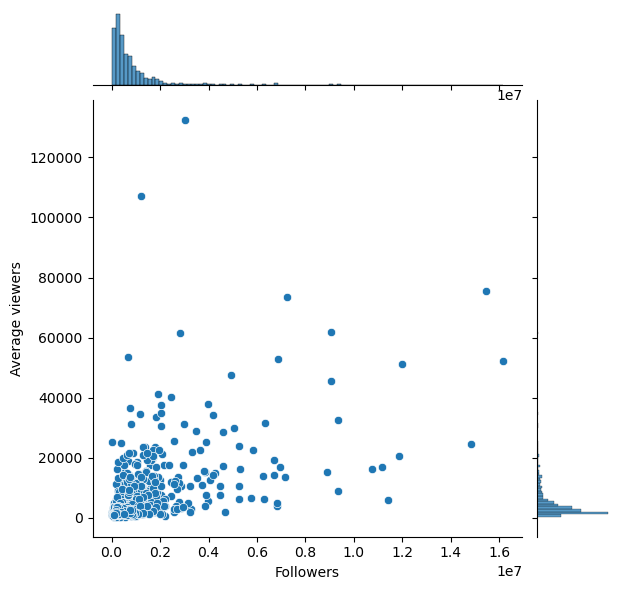

In [103]:
sns.jointplot(data=df, x='Followers', y='Average viewers')
# plt.plot(xs, ys, color = 'orange')

In [101]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed = pt.fit_transform(df[['Followers', 'Average viewers']])
df1 = pd.DataFrame(transformed)
df1 = df1.rename(columns={0: 'Followers', 1: 'Average_viewers'})

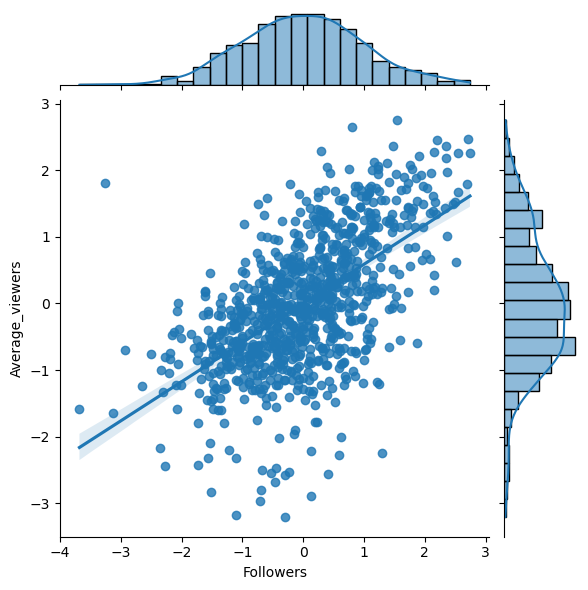

In [102]:
sns.jointplot(data=df1, x = 'Followers', y ='Average_viewers', kind="reg")

In [67]:
import statsmodels.formula.api as smf

In [74]:
fit = smf.ols("Average_viewers ~ Stream_time", data=df1).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:        Average_viewers   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     750.5
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          1.40e-120
Time:                        14:09:08   Log-Likelihood:                -1003.7
No. Observations:                 900   AIC:                             2011.
Df Residuals:                     898   BIC:                             2021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.996e-16      0.025  -2.03e-14      

In [ ]:
Histogram of residuals, qq plot of residuals, residuals vs mins